## A different example

In [1]:
from sympy.physics.quantum import *
from sympy.physics.quantum.boson import *
from sympy.physics.quantum.operatorordering import *

In [2]:
import Potapov_Code.Roots as Roots
import Potapov_Code.Potapov as Potapov
import Potapov_Code.Time_Delay_Network as Time_Delay_Network
import Potapov_Code.Time_Sims_nonlin as Time_Sims_nonlin
import Potapov_Code.functions as functions
import Potapov_Code.tests as tests
import Potapov_Code.Hamiltonian as Hamiltonian

import pickle
import numpy as np
import sympy as sp
import numpy.linalg as la
from scipy.integrate import ode

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sympy import init_printing
init_printing() 

In [4]:
## Make base system

Ex = Time_Delay_Network.Example3(r1 = 0.9, r3 = 0.9, max_linewidth=15.,max_freq=25.)
Ex.run_Potapov()
modes = functions.spatial_modes(Ex.roots,Ex.M1,Ex.E,Ex.delays)
M = len(Ex.roots)

A_d,B_d,C_d,D_d = Ex.get_Potapov_ABCD(doubled=True)
A,B,C,D = Ex.get_Potapov_ABCD(doubled=False)

In [5]:
## Make Hamiltonian and equations of motion

ham = Hamiltonian.Hamiltonian(Ex.roots,modes,Ex.delays,Omega=-1j*A_d)

ham.make_chi_nonlinearity(delay_indices=0,start_nonlin=0,
                           length_nonlin=0.1,
                           )
H = ham.make_H()
eq_mot = ham.make_eq_motion()

a_in = lambda t: np.asmatrix([1.]*np.shape(D_d)[-1]).T  ## make a sample input function

f = Time_Sims_nonlin.make_f(eq_mot,B_d,a_in)
f_lin = Time_Sims_nonlin.make_f_lin(A_d,B_d,a_in)

In [6]:
y0 = np.asmatrix([0.]*ham.m).T
Y_lin = Time_Sims_nonlin.run_ODE(f_lin, a_in, C_d, D_d, 2*M, T = 15, dt = 0.01)  ## select f here.
Y_nonlin = Time_Sims_nonlin.run_ODE(f, a_in, C_d, D_d, 2*M, T = 15, dt = 0.01)  ## select f here.

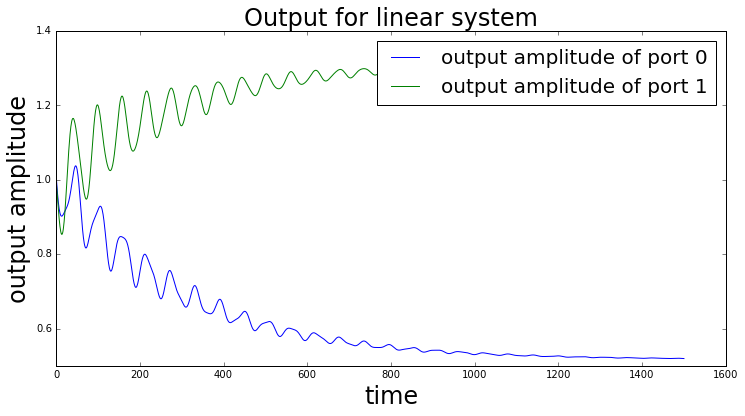

In [7]:
plt.figure(figsize=(12,6))
for i in range(2):
    plt.plot( [abs(y[i][0,0]) for y in Y_lin],label = 'output amplitude of port '+str(i))
    plt.xlabel('time',{'fontsize': 24})
    plt.ylabel('output amplitude',{'fontsize': 24})
    plt.title('Output for linear system',{'fontsize': 24})
    plt.legend(loc='upper right',fontsize=20)

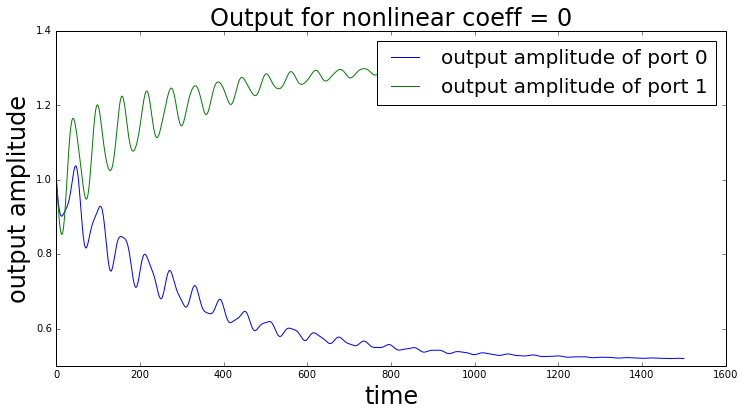

In [8]:
plt.figure(figsize=(12,6))
for i in range(2):
    plt.plot( [ abs(y[i][0,0]) for y in Y_nonlin],label = 'output amplitude of port '+str(i))
    plt.xlabel('time',{'fontsize': 24})
    plt.ylabel('output amplitude',{'fontsize': 24})
    plt.title('Output for nonlinear coeff = ' + str(0),{'fontsize': 24})
    plt.legend(loc='upper right',fontsize=20)

# Let's add nonlinear terms

We wish to see the effects of increasing the nonlinear term on the outputs.

In [9]:
#nonlin_coeffs = [10.0,32.5,55.0,77.5,100.0,200.0,500.0,1000.0,2000.0,5000.0,10000.0]

nonlin_coeffs = np.array(range(1,10))*1e24

save_outputs = True
run_again = True

In [10]:
def make_timeseries(coeff):
    ham.nonlin_coeff = coeff
    H = ham.make_H(-1j*A)
    eq_mot = ham.make_eq_motion()
    f = Time_Sims_nonlin.make_f(eq_mot,B_d,a_in)
    Y = Time_Sims_nonlin.run_ODE(f, a_in, C_d, D_d, 2*M, T = 15, dt = 0.01)  ## select f here.
    return Y

In [11]:
def run_over_again():
    for k in nonlin_coeffs:
        Y[k]=make_timeseries(k)

In [12]:
def save(Y):
    pkl_file = open('data/output_timeseries_various_nonlins.pkl', 'wb')
    pickle.dump(Y, pkl_file)
    pkl_file.close()

In [13]:
if run_again:
    Y = {} ##make dict to store timeseries
    run_over_again()
    if save_outputs:
        save(Y)

/Users/gil/anaconda/lib/python2.7/site-packages/scipy/integrate/_ode.py:869: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


In [14]:
try:  # load file if it exisst
    pkl_file = open('data/output_timeseries_various_nonlins.pkl', 'rb')
    Y = pickle.load( open('data/output_timeseries_various_nonlins.pkl', 'rb'))
    pkl_file.close()
except: # otherwise, generate the data over again
    Y = {} ##make dict to store timeseries
    run_over_again()
    if save_outputs:
        save(Y)

In [15]:

## !! last one was unstable at T~0.77 !!
ham.nonlin_coeff = nonlin_coeffs[-1]
H = ham.make_H(-1j*A)
eq_mot = ham.make_eq_motion()
f = Time_Sims_nonlin.make_f(eq_mot,B_d,a_in)
Y[nonlin_coeffs[-1]] = Time_Sims_nonlin.run_ODE(f, a_in, C_d, D_d, 2*M, T = 0.75, dt = 0.01)  ## select f here.


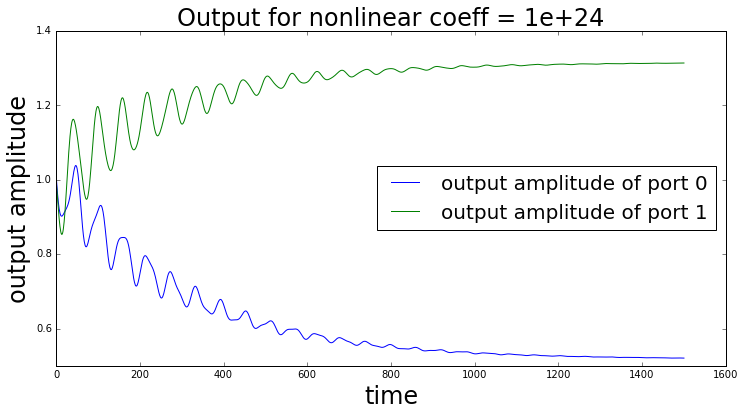

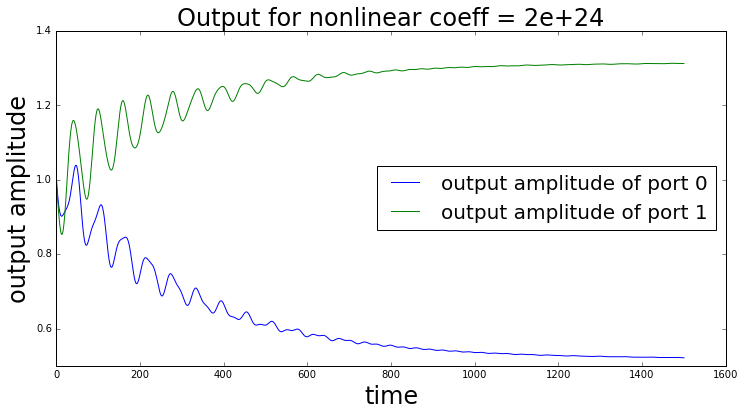

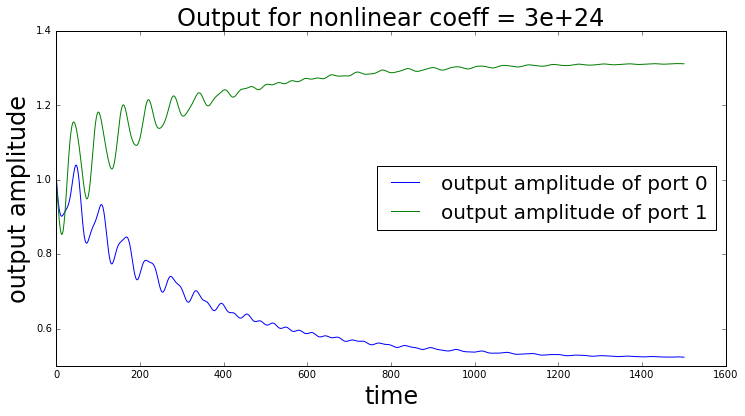

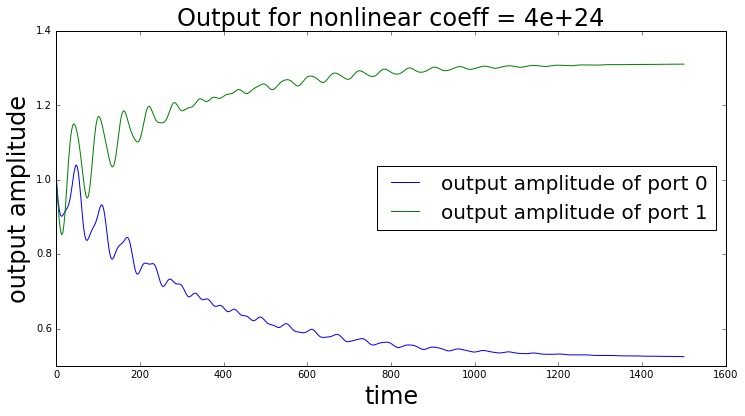

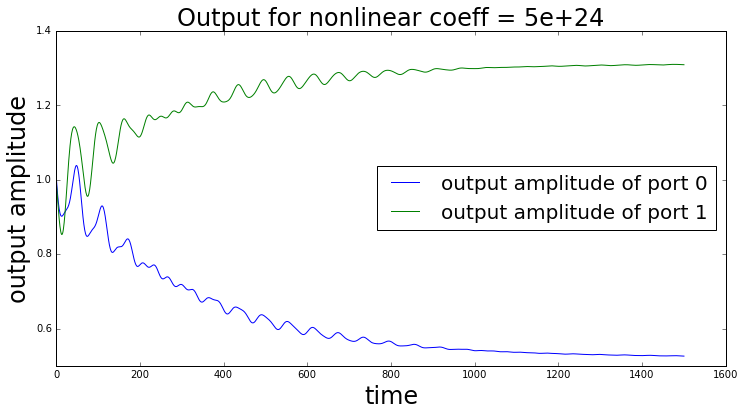

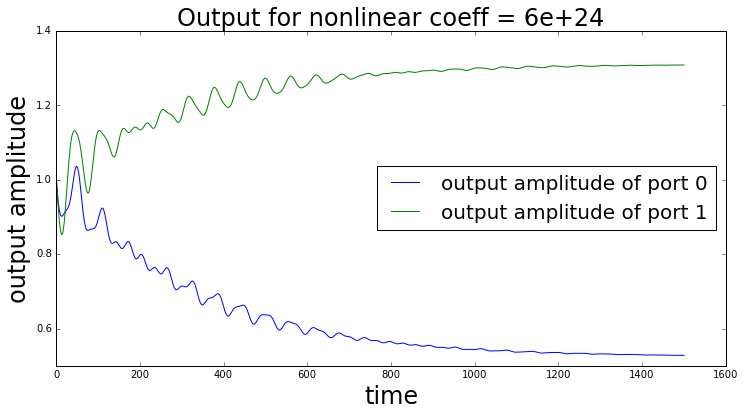

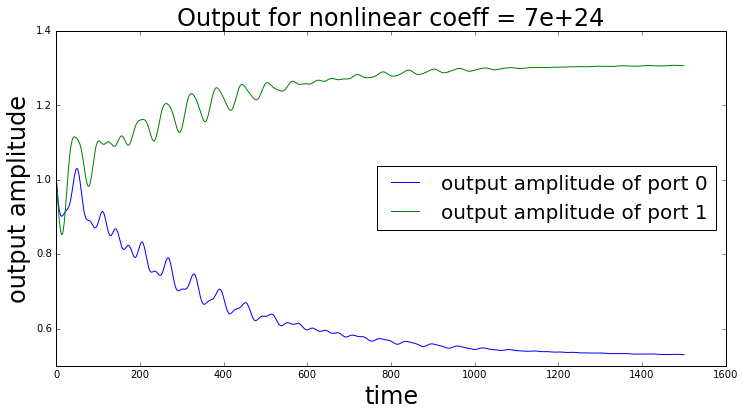

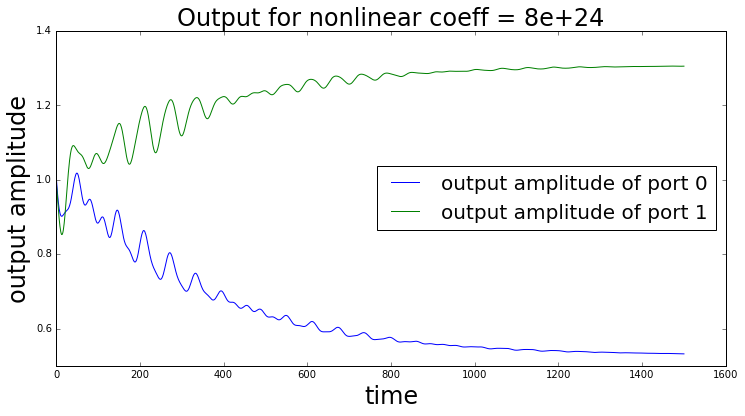

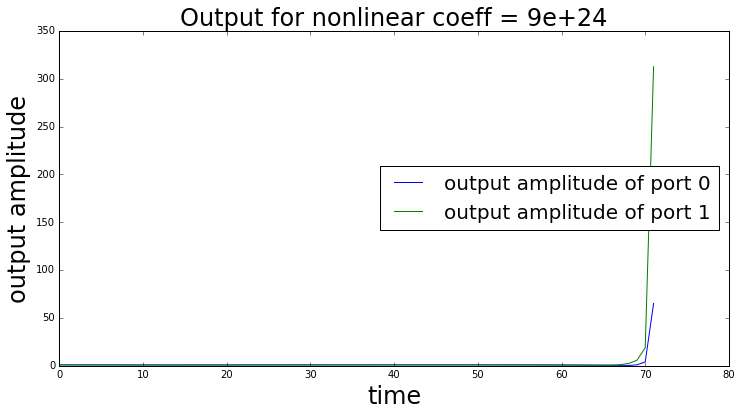

In [16]:
## plot timeseries for different nonlinearities

keys=Y.keys()

for k in sorted(keys):
    plt.figure(figsize=(12,6))
    for i in range(2):
        plt.xlabel('time',{'fontsize': 24})
        plt.ylabel('output amplitude',{'fontsize': 24})
        plt.title('Output for nonlinear coeff = ' + str(k),{'fontsize': 24})
        plt.plot( [ abs(y[i][0,0]) for y in Y[k]], label = 'output amplitude of port '+str(i))
        plt.legend(loc='center right',fontsize=20)

In [18]:
import itertools

In [20]:
blah = list(itertools.product([-1, 1],
            repeat=4))

In [23]:
for i in blah:
    print i

(-1, -1, -1, -1)
(-1, -1, -1, 1)
(-1, -1, 1, -1)
(-1, -1, 1, 1)
(-1, 1, -1, -1)
(-1, 1, -1, 1)
(-1, 1, 1, -1)
(-1, 1, 1, 1)
(1, -1, -1, -1)
(1, -1, -1, 1)
(1, -1, 1, -1)
(1, -1, 1, 1)
(1, 1, -1, -1)
(1, 1, -1, 1)
(1, 1, 1, -1)
(1, 1, 1, 1)


In [24]:
f = lambda x,y: x+y

In [25]:
z = (5,6)

In [27]:
f(*z)

In [28]:
g = lambda x,y,z: x+ y+z

In [30]:
g(z,5)

TypeError: <lambda>() takes exactly 3 arguments (2 given)